# Rapid EDA 2.2 - Food Choices
## Phase 2 Rapid EDA 2

In [113]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

In [114]:
food_coded = pd.read_csv('../data/food_coded.csv')

In [115]:
food_coded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [116]:
food_coded.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [117]:
# Target variable I've decided for this analysis: GPA
# Columns I'm interested in: GPA, diet_current_coded, employment, vitamins, on_off_campus

food_coded_subset = food_coded[['GPA', 'diet_current_coded', 'employment', 'vitamins', 'on_off_campus']]
food_coded_subset.head()

,GPA,diet_current_coded,employment,vitamins,on_off_campus
0,2.4,1,3.0,1,1.0
1,3.654,2,2.0,2,1.0
2,3.3,3,3.0,1,2.0
3,3.2,2,3.0,1,1.0
4,3.5,2,2.0,2,1.0


From the food_coded data codebook:
- `GPA` – numerical, actual GPA

- `diet_current_coded`
(based on words used to describe the diet)

1 – healthy/balanced/moderated/

2 – unhealthy/cheap/too much/random/

3 – the same thing over and over

4 – unclear

- `employment` – do you work? 

1 - yes full time 

2 - yes part time 

3 - no

4 - other


- `vitamins` – do you take any supplements or vitamins?

1 – yes

2 – no

- `on_off_campus` – living situation

1 - On campus 

2 - Rent out of campus 

3 - Live with my parents and commute 

4 - Own my own house



In [118]:
food_coded_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GPA                 123 non-null    object 
 1   diet_current_coded  125 non-null    int64  
 2   employment          116 non-null    float64
 3   vitamins            125 non-null    int64  
 4   on_off_campus       124 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.0+ KB


In [119]:
food_coded_subset.loc[food_coded_subset['employment'].isna() | food_coded_subset['GPA'].isna() | food_coded_subset['on_off_campus'].isna()]

,GPA,diet_current_coded,employment,vitamins,on_off_campus
15,NaN,2,3.0,2,1.0
43,3.5,2,NaN,1,NaN
47,2.8,2,NaN,2,1.0
49,3.83,2,NaN,2,1.0
52,3.3,3,NaN,2,1.0
53,3.292,4,NaN,1,3.0
83,3.7,2,NaN,2,1.0
94,3.75,1,NaN,1,1.0
102,NaN,1,3.0,1,1.0
105,3,2,NaN,2,2.0


In [120]:
food_coded_subset['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
       'Personal ', '2.6', '3.67', '3.73', '3.79 bitch', '2.71', '3.68',
       '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

In [121]:
try:
    food_coded_subset = food_coded_subset.dropna(subset=['GPA'])
except:
    print("GPA nulls already dropped")

food_coded_subset = food_coded_subset.loc[food_coded_subset['GPA'].str.contains("\d$")]
food_coded_subset['GPA'] = food_coded_subset['GPA'].astype(float)

In [122]:
food_coded_subset['GPA'].dtype

dtype('float64')

#### What is the average GPA of students across different diets?

In [123]:
def GPA_across_subgroups(data, groupby_col, agg_col='GPA'):
    agg_data = data.groupby(groupby_col)[agg_col].mean()

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x=agg_data.index, y=agg_data)
    
    ax.set_title(f'Average GPA for each category in {groupby_col}')
    ax.set_ylim([3.0, 3.6])
    ax.set_xlabel(agg_col)
    ax.set_ylabel('Average GPA')
    plt.tight_layout()
    plt.show()

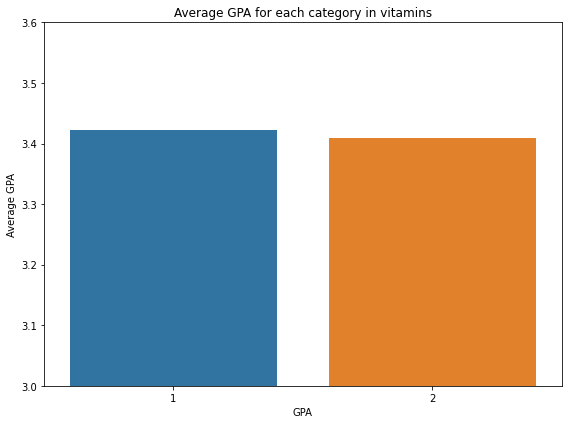

In [124]:
GPA_across_subgroups(data=food_coded_subset, groupby_col='vitamins')

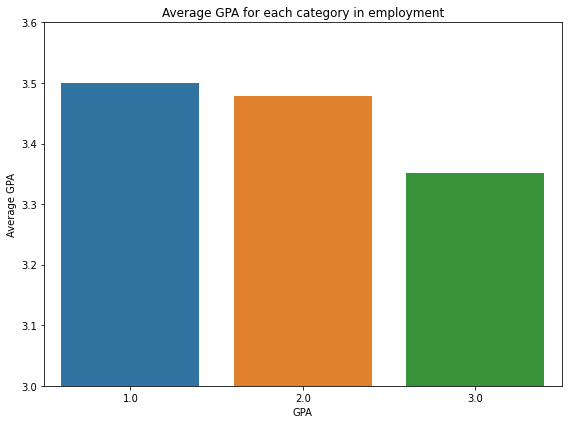

In [125]:
GPA_across_subgroups(data=food_coded_subset.dropna(subset=['employment']), groupby_col='employment')

## Question: Is there a significant difference in GPA for students who are employed versus students who are not employed?

$H_0$: There is no significant difference in GPA for students who are employed

$H_a$: There is a significant difference in GPA for students who are employed

$\alpha = 0.05$

In [126]:
employed_not_employed = food_coded_subset.dropna(subset=['employment'])
employed_not_employed['is_employed'] = employed_not_employed['employment'].map(lambda x: 1 if (x == 1) | (x == 2) else 0)

<ipython-input-126-712b4eb85ae7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed_not_employed['is_employed'] = employed_not_employed['employment'].map(lambda x: 1 if (x == 1) | (x == 2) else 0)


In [127]:
employed_not_employed.head()

,GPA,diet_current_coded,employment,vitamins,on_off_campus,is_employed
0,2.400,1,3.0,1,1.0,0
1,3.654,2,2.0,2,1.0,1
2,3.300,3,3.0,1,2.0,0
3,3.200,2,3.0,1,1.0,0
4,3.500,2,2.0,2,1.0,1


In [134]:
IS_EMPLOYED = employed_not_employed['is_employed'] == 1
IS_EMPLOYED

0      False
1       True
2      False
3      False
4       True
       ...  
120     True
121    False
122    False
123     True
124     True
Name: is_employed, Length: 111, dtype: bool

In [140]:
employed_group = employed_not_employed[IS_EMPLOYED]['GPA']
unemployed_group = employed_not_employed[~IS_EMPLOYED]['GPA']

Ttest_indResult(statistic=1.7325305450981536, pvalue=0.08600761663824551)

<Axes: xlabel='GPA', ylabel='Count'>

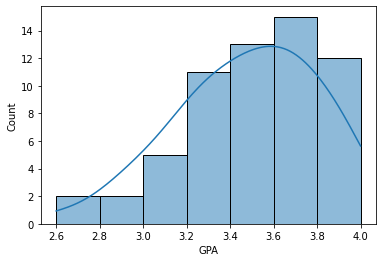

In [145]:
sns.histplot(data=employed_group, kde=True)

<Axes: xlabel='GPA', ylabel='Count'>

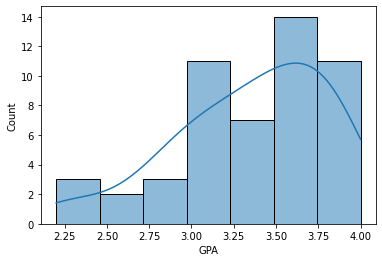

In [146]:
sns.histplot(data=unemployed_group, kde=True)


#### NOTE: Even though these distributions are clearly skewed and don't seem normal, I'm going to be using a two sample t-test to get practice with hypothesis testing.

In [147]:
stats.ttest_ind(employed_group, unemployed_group, equal_var=False)

Ttest_indResult(statistic=1.688530565580137, pvalue=0.0947986981587984)

#### Results
Since the p-value $> 0.05$, we cannot reject the null hypothesis that GPA is significantly different for those who are employed vs. those who are unemployed.